# Statystyka i analiza danych - zdanie domowe
Igor Czudy 145198 <br>
piątek 15.10

# Opis zbioru zdań 
Analizowany będzie zbór danych z 2013 stworzony przez studentów z  FSEV UK i wypełniony przez grupe wiekową 15-30 lat (obserwacja). Dane posiadają 1010 wierszy i 150 kolumn. W mojej pracy skupie się na analizie koralacji między wiarą w Boga, poczuciu szczęscia, uczciowości, problemów z używkami oraz wzrostem a wagom. Większość zmiennych to zmienne liczbowe (int). Zmienne nie liczbowe w pewnym momęcie zostaną zakodowane na zmienne liczbowe.<br>
Zbiór danych dostępny jest na stronie kaggle: https://www.kaggle.com/miroslavsabo/young-people-survey


In [2]:
library(ggplot2)
library(corrplot)

Y<-read.csv(file="Downloads/archive/responses.csv", header=TRUE, sep=",")
head(Y)

corrplot 0.88 loaded



,Music,Slow.songs.or.fast.songs,Dance,Folk,Country,Classical.music,Musical,Pop,Rock,Metal.or.Hardrock,...,Age,Height,Weight,Number.of.siblings,Gender,Left...right.handed,Education,Only.child,Village...town,House...block.of.flats
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5,3,2,1,2,2,1,5,5,1,...,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
2,4,4,2,1,1,1,2,3,5,4,...,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
3,5,5,2,2,3,4,5,3,5,3,...,20,176,67,2,female,right handed,secondary school,no,city,block of flats
4,5,3,2,1,1,1,1,2,2,1,...,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
5,5,3,4,3,2,4,3,5,3,1,...,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow
6,5,3,2,3,2,3,3,2,5,5,...,20,186,77,1,male,right handed,secondary school,no,city,block of flats


# Przegląd danych 
Tworzymy nową ramkę danych z interesujących nas kolumn. Dodatkowo kodujemy (zamieniamy) nie numeryczne dane(Alcohol, Smowking, Lying) na numerczyne. <br>
Interesujące nas pytania: <br>
-I believe in God.: Strongly disagree 1-2-3-4-5 Strongly agree<br>
-I am 100% happy with my life.: Strongly disagree 1-2-3-4-5 Strongly agree<br>
-Drinking: Never(1) - Social drinker(2) - Drink a lot(3)<br>
-Smoking habits: Never smoked(1) - Tried smoking(2) - Former smoker(3) - Current smoker(4)<br>
-I don't like seeing animals suffering.: Strongly disagree 1-2-3-4-5 Strongly agree<br>
-Do you lie to others?: Never(1) - Only to avoid hurting someone(2) - Sometimes(3) - Everytime it suits me(4)<br>
-I used to cheat at school.: Strongly disagree 1-2-3-4-5 Strongly agree<br>
-Height:<br>
-Weight:<br>

In [3]:
Y$Alcohol[Y$Alcohol == "never"] <- 1
Y$Alcohol[Y$Alcohol == "social drinker"] <- 2
Y$Alcohol[Y$Alcohol == "drink a lot"] <- 3
Y$Alcohol=as.numeric(as.character(Y$Alcohol))
Y$Smoking[Y$Smoking == "never smoked"] <- 1
Y$Smoking[Y$Smoking == "tried smoking"] <- 2
Y$Smoking[Y$Smoking == "former smoker"] <- 3
Y$Smoking[Y$Smoking == "current smoker"] <- 4
Y$Smoking=as.numeric(as.character(Y$Smoking))
Y$Lying[Y$Lying == "never"] <- 1
Y$Lying[Y$Lying == "only to avoid hurting someone"] <- 2
Y$Lying[Y$Lying == "sometimes"] <- 3
Y$Lying[Y$Lying == "everytime it suits me"] <- 4
Y$Lying=as.numeric(as.character(Y$Lying))

Z<-data.frame(Y$God,Y$Happiness.in.life,Y$Alcohol,Y$Smoking,Y$Compassion.to.animals,Y$Lying,Y$Cheating.in.school,Y$Height,Y$Weight)
cat("liczba zmiennych:", ncol(Z), "\n")
cat("liczba obserwacji:", nrow(Z), "\n")
head(Z)

liczba zmiennych: 9 
liczba obserwacji: 1010 


,Y.God,Y.Happiness.in.life,Y.Alcohol,Y.Smoking,Y.Compassion.to.animals,Y.Lying,Y.Cheating.in.school,Y.Height,Y.Weight
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,1,4,3,1,5,1,2,163,48
2,1,4,3,1,4,3,4,163,58
3,5,4,3,2,4,3,3,176,67
4,4,2,3,3,2,2,5,172,59
5,5,3,2,2,3,4,5,170,59
6,3,3,1,1,5,2,4,186,77


# Podstawowe statystyki


In [4]:
statystyki <- data.frame(row.names=c('min', 'max', 'rozstęp', 'moda', 'mediana', 'średnia', 'stdev'))

my.max <- function(x) ifelse( !all(is.na(x)), max(x, na.rm=T), NA)
my.min <- function(x) ifelse( !all(is.na(x)), min(x, na.rm=T), NA)
my.median <- function(x) ifelse( !all(is.na(x)), median(x, na.rm=T), NA)
my.mean <- function(x) ifelse( !all(is.na(x)), mean(x, na.rm=T), NA)
my.min <- function(x) ifelse( !all(is.na(x)), min(x, na.rm=T), NA)
my.var <- function(x) ifelse( !all(is.na(x)), var(x, na.rm=T), NA)


for (name in colnames(Z)) {
    x <- Z[,name]
    moda <- names(table(x))[table(x) == my.max(table(x))]
    minn <- my.min(x)
    maxx <- my.max(x)
    statystyki[,name] <- c(
        minn, maxx, maxx - minn, moda, my.median(x), round(my.mean(x), 2), round(sqrt(my.var(x)), 2))
}

statystyki

,Y.God,Y.Happiness.in.life,Y.Alcohol,Y.Smoking,Y.Compassion.to.animals,Y.Lying,Y.Cheating.in.school,Y.Height,Y.Weight
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
min,1,1,1,1,1,1,1,62,41
max,5,5,3,4,5,4,5,203,165
rozstęp,4,4,2,3,4,3,4,141,124
moda,5,4,2,2,5,3,5,170,60
mediana,3,4,2,2,4,3,4,173,64
średnia,3.3,3.71,2.1,2.34,3.97,2.77,3.74,173.51,66.41
stdev,1.48,0.82,0.58,1.01,1.19,0.74,1.25,10.02,13.84


# Korelacje i wykresy

,Y.God,Y.Happiness.in.life,Y.Alcohol,Y.Smoking,Y.Compassion.to.animals,Y.Lying,Y.Cheating.in.school,Y.Height,Y.Weight
Y.God,1.00000000,0.10148701,-0.08795514,-0.10298955,0.025966685,-0.02606417,-0.036036183,-0.11933546,-0.10925797
Y.Happiness.in.life,0.10148701,1.00000000,0.03222682,0.02510921,-0.022561746,-0.02081383,0.025390521,0.03296469,0.01615942
Y.Alcohol,-0.08795514,0.03222682,1.00000000,0.31979151,-0.067610041,0.12452691,0.162399127,0.07449212,0.03221379
Y.Smoking,-0.10298955,0.02510921,0.31979151,1.00000000,0.010988703,0.08095421,0.231057674,0.02011849,0.05550351
Y.Compassion.to.animals,0.02596669,-0.02256175,-0.06761004,0.01098870,1.000000000,-0.01588635,-0.008088769,-0.14189012,-0.13928165
Y.Lying,-0.02606417,-0.02081383,0.12452691,0.08095421,-0.015886349,1.00000000,0.110463991,-0.03553532,-0.01209999
Y.Cheating.in.school,-0.03603618,0.02539052,0.16239913,0.23105767,-0.008088769,0.11046399,1.000000000,0.03087939,-0.02103814
Y.Height,-0.11933546,0.03296469,0.07449212,0.02011849,-0.141890123,-0.03553532,0.030879390,1.00000000,0.73518456
Y.Weight,-0.10925797,0.01615942,0.03221379,0.05550351,-0.139281653,-0.01209999,-0.021038145,0.73518456,1.00000000


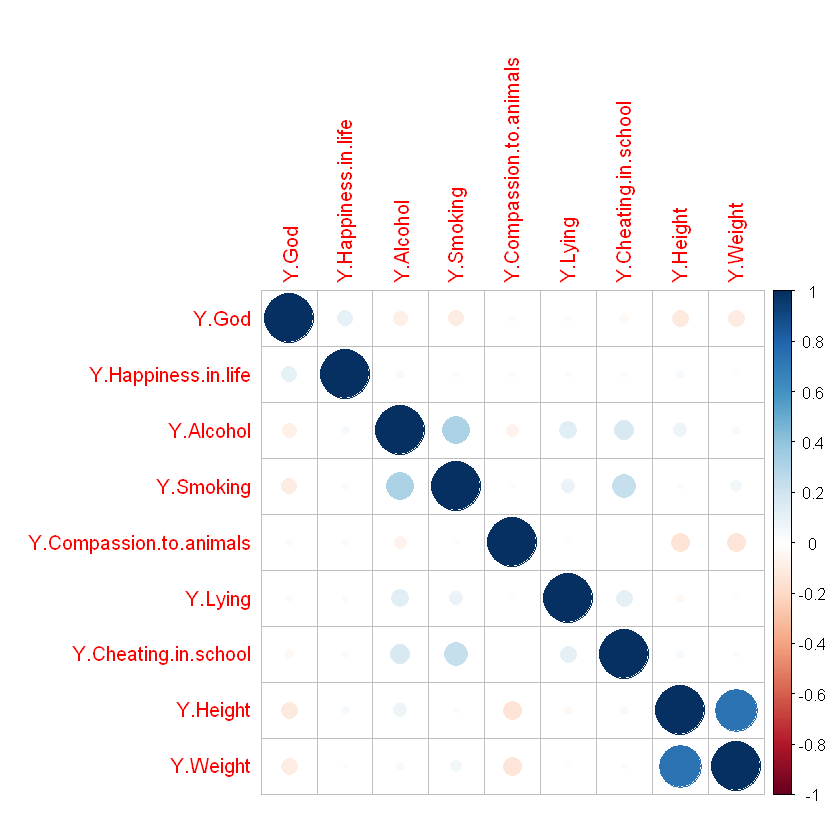

In [5]:
#plot(Z)
cor(Z,use = "complete.obs")
corrplot(cor(Z,use = "complete.obs"))

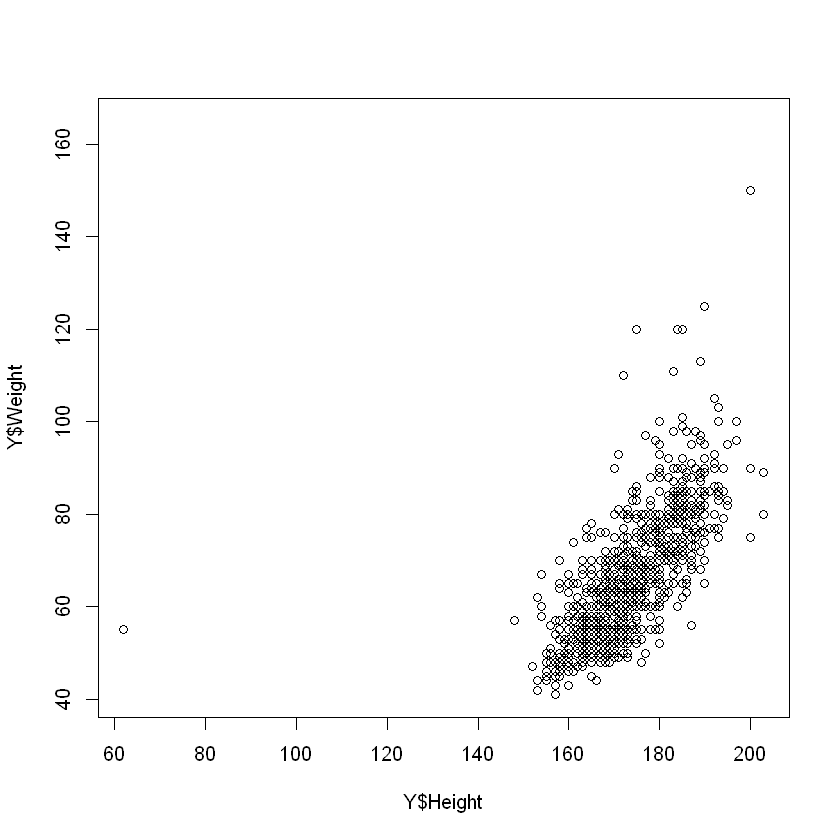

In [6]:
plot(Y$Height,Y$Weight)

# Szereg rozdzielczy i histogram
Zlikwidowałem znaleziony błąd w danych w kolumnie wysokość. Jedna osoba zanaczyła, że ma 62cm wzrostu co jest oczywistym błędem. (outliner)


[147,152) [152,157) [157,162) [162,167) [167,172) [172,177) [177,182) [182,187) 
        1        17        67       150       219       176       138       124 
[187,192) [192,197) [197,202) 
       66        25         5 

Warning message:
"Ignoring unknown parameters: stat_bin"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 20 rows containing non-finite values (stat_bin)."


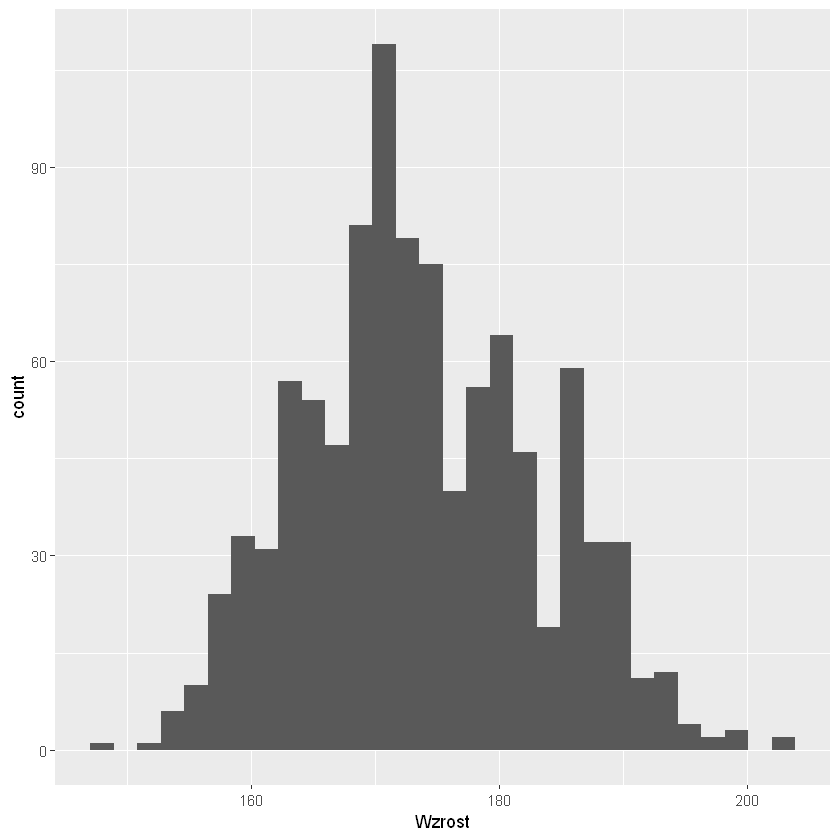

In [7]:
Y$Height[Y$Height==62]<-162#zamiana błędnie wypisanych danych z 62 na 162

table(cut(Y$Height, seq(147, 204, 5), right=FALSE))

p <- ggplot(Y, aes(x=Height)) + 
  geom_histogram(stat_bin=5) +
    labs(x='Wzrost')

p

Warning message:
"Ignoring unknown parameters: stat_bin"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 20 rows containing non-finite values (stat_bin)."


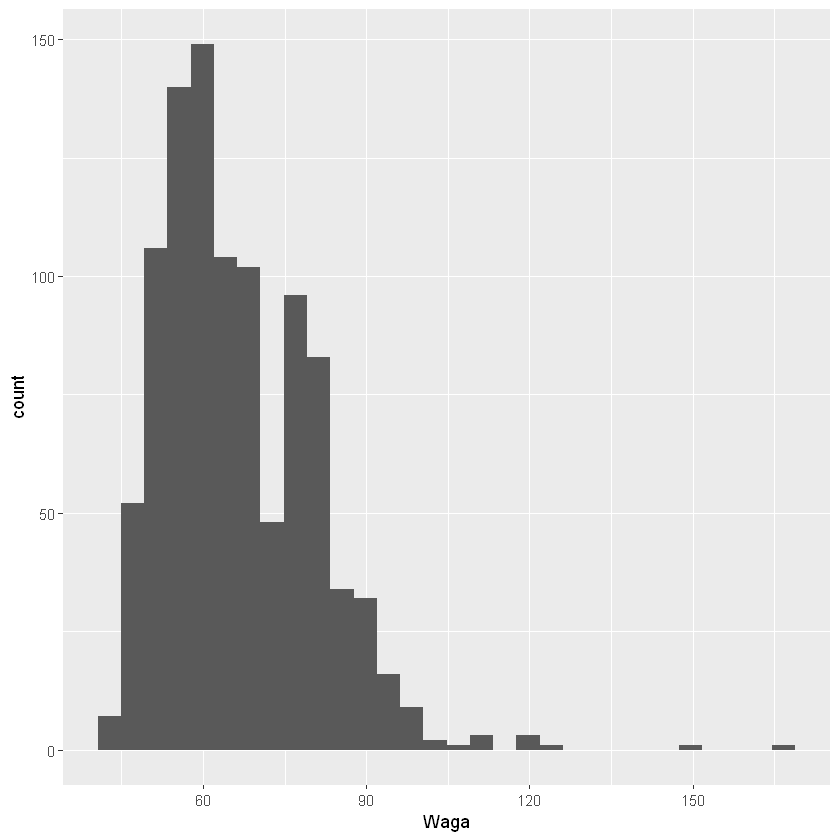

In [54]:
p <- ggplot(Y, aes(x=Weight)) + 
  geom_histogram(stat_bin=5) +
    labs(x='Waga')

p

# Wnioski
-Waga i wzrost są przyblożonymi rozkłądami normalnymi <br>
-Waga jest dodatnio skorelowana ze wzrostem<br>
-Istniejej bardzo mała korelacja osób uzalenionych od papierosów oraz uzależnionych od alkohol <br>
-Istniejej bardzo mała korelacja osób uzalenionych od papierosów oraz oszokujących na egzaminach  <br>



# Testowanie hipotez
Czy istaeje zależność między wzrostem a wagą? <br>
Hipoteza 0: p=0<br>
Hipoteza 1: p!=0 <br><br>
Test t przy alpha=0.05  (szczerze mówiąc to nie wiem czy dobrego testu użyłem, bo przecież próba jest duża, więc może po prostu Z. Chociaż nad chisq też się zastanawaiłem :/ )<br>
Założenia: zmienne (X,Y) populacji mają dwuwymiarowy rozkładnormalny o nieznanym współczynniku korelacji ρ. Na podstawie n -elementowej próby wyznaczono r . 


## Decyzja
Odrzucamy H0 na rzecz H1 czyli istnieje zależność między wzrostem a wagą. <br>
Oczywiście istaniejący związej nie oznacza przyczynowości. Powinnismy teraz przemyśleć wynik. Po chwili zastanowienia i przy ogólnej znajomości badanego tematu, możemy stwierdzić, że osoby wyższe są cięższe. Ma to sens, ponieważ osoby wyższe mają większą obietość ciała, tym samym są na ogół cięższe. Nie przeszkadza to jednak w znalezieniu niskiej osoby, która jest cięższa od wyższej.    

In [27]:
cor.test(Y$Height,Y$Weight)
test<-cor.test(Y$Height,Y$Weight)
print("Wartość statystyki: ", quote = FALSE)
test$statistic

print("Zbiór krytyczny: ", quote = FALSE)
noquote(paste('(', round(qchisq(1-0.05, 6),3), ",inf)", sep = ""))


#H0:Brak zaleznosci
#H1:Istnieje zaleznosc

print("Decyzja: ", quote = FALSE)
test$p.value[[1]]
if (0.05 > test$p.value[[1]])
{
    noquote("Odrzucamy H0 na rzecz H1")
}else
{
    noquote("Brak podstaw do odrzucenia H0")
}


	Pearson's product-moment correlation

data:  Y$Height and Y$Weight
t = 34.064, df = 978, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7066148 0.7640192
sample estimates:
      cor 
0.7366411 


[1] Wartość statystyki: 


t 
34.06405

[1] Zbiór krytyczny: 


[1] (12.592,inf)

[1] Decyzja: 


[1] 2.5424e-168

[1] Odrzucamy H0 na rzecz H1

# Testowanie hipotez
Czy istaeje zależność między osobami uzależnionymi od papierosów i od alkoholu? <br>
Hipoteza 0: p=0<br>
Hipoteza 1: p!=0 <br><br>
Test t przy alpha=0.05  <br>
Założenia: zmienne (X,Y) populacji mają dwuwymiarowy rozkładnormalny o nieznanym współczynniku korelacji ρ. Na podstawie n -elementowej próby wyznaczono r . 


## Decyzja
Odrzucamy H0 na rzecz H1 czyli istnieje zależność między osobami uzależnionymi od papierosów i od alkoholu. <br>
Oczywiście istaniejący związej nie oznacza przyczynowości. Powinnismy teraz przemyśleć wynik. W tej sytuacji najleiej byłoby o opinie zapytać specjalistę-psychologa uzależnień. Mi samemo cięzko jest wypowiedzieć się na temat tej korelacji. Na chłobski rozum wydaje się być to sensowne, jednak moja opinie może być obarczona różnymi błędami poznawczymi. 

In [30]:
cor.test(Y$Smoking,Y$Alcohol)
test<-cor.test(Y$Smoking,Y$Alcohol)
print("Wartość statystyki: ", quote = FALSE)
test$statistic

print("Zbiór krytyczny: ", quote = FALSE)
noquote(paste('(', round(qchisq(1-0.05, 6),3), ",inf)", sep = ""))


#H0:Brak zaleznosci
#H1:Istnieje zaleznosc

print("Decyzja: ", quote = FALSE)
test$p.value[[1]]
if (0.05 > test$p.value[[1]])
{
    noquote("Odrzucamy H0 na rzecz H1")
}else
{
    noquote("Brak podstaw do odrzucenia H0")
}


	Pearson's product-moment correlation

data:  Y$Smoking and Y$Alcohol
t = 10.95, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2710069 0.3817406
sample estimates:
      cor 
0.3274979 


[1] Wartość statystyki: 


t 
10.9499

[1] Zbiór krytyczny: 


[1] (12.592,inf)

[1] Decyzja: 


[1] 1.979412e-26

[1] Odrzucamy H0 na rzecz H1